# <font color='#008abc'>GDP Analysis</font> 



## <font color='#008abc'>Part I-A</font>
- __Calculate average growth rate of states for the duration 2013-14, 2014-15 and 2015-16__
   - Which states have been growing consistently fast, and which ones have been struggling?
   - What has been the average growth rate of your home state, and how does it compare to the national average over this duration? 


- __Plot the total GDP of the states for the year 2015-16:__
   - Identify the top-5 and the bottom-5 states based on total GDP

#### Import required packages

In [73]:
# Importing packages
import pandas as pd
import os

# Packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.labelcolor': '#008abc',
         'axes.titlesize':'20',
         'text.color':'green',
         'axes.titlepad': 35,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

### <font color='#008abc'><u>Data Preparation:</u></font>
- The required data is fetched from the input CSV file into dataframe.
- <b> NOTE</b>: The input file should be placed in the same directory as of the notebook.

In [75]:
# Read data from the input csv file
state_gdp_df = pd.read_csv('State_wise_GDP_at_current_price.csv', sep=',')

### <font color='#008abc'><u>Data Analysis</u></font> :
- The dataset is analyzed for checking the datatypes and missing values

In [76]:
state_gdp_df.set_index(['Items  Description','Duration']).T

Items  Description        GSDP - CURRENT PRICES (` in Crore)             \
Duration                                             2011-12    2012-13   
Andhra Pradesh                                      379402.0   411404.0   
Arunachal Pradesh                                    11063.0    12547.0   
Assam                                               143175.0   156864.0   
Bihar                                               247144.0   282368.0   
Chhattisgarh                                        158074.0   177511.0   
Goa                                                  42367.0    38120.0   
Gujarat                                             615606.0   724495.0   
Haryana                                             297539.0   347032.0   
Himachal Pradesh                                     72720.0    82820.0   
Jammu & Kashmir                                      78254.0    87105.0   
Jharkhand                                           150918.0   174724.0   
Karnataka                                           603778.0   691700.0   
Kerala                                              364048.0   412313.0   
Madhya Pradesh                                      315561.0   380924.0   
Maharashtra                                        1272967.0  1448466.0   
Manipur                                              12915.0    13748.0   
Meghalaya                                            19918.0    21872.0   
Mizoram                                               7259.0     8362.0   
Nagaland                                             11839.0    13619.0   
Odisha                                              227872.0   258275.0   
Punjab                                              266628.0   297734.0   
Rajasthan                                           436465.0   494004.0   
Sikkim                                               11165.0    12338.0   
Tamil Nadu                                          751485.0   855481.0   
Telangana                                           359433.0   401493.0   
Tripura                                              19208.0    21663.0   
Uttar Pradesh                                       724049.0   822903.0   
Uttarakhand                                         115523.0   131835.0   
West Bengal1                                             NaN        NaN   
Andaman & Nicobar Islands                             3979.0     4421.0   
Chandigarh                                           18768.0    21609.0   
Delhi                                               343767.0   391238.0   
Puducherry                                           16818.0    18875.0   
All_India GDP                                      8736039.0  9946636.0   

Items  Description                                                         \
Duration                      2013-14     2014-15     2015-16     2016-17   
Andhra Pradesh               464272.0    526468.0    609934.0    699307.0   
Arunachal Pradesh             14602.0     16761.0     18784.0         NaN   
Assam                        177745.0    198098.0    224234.0         NaN   
Bihar                        317101.0    373920.0    413503.0         NaN   
Chhattisgarh                 206690.0    234982.0    260776.0    290140.0   
Goa                           35921.0     40633.0     45002.0         NaN   
Gujarat                      807623.0    895027.0    994316.0         NaN   
Haryana                      400662.0    437462.0    485184.0    547396.0   
Himachal Pradesh              94764.0    104369.0         NaN         NaN   
Jammu & Kashmir               95893.0    100404.0    118387.0         NaN   
Jharkhand                    188567.0    217107.0    241955.0         NaN   
Karnataka                    817886.0    921788.0   1027068.0         NaN   
Kerala                       465041.0    526002.0    588337.0         NaN   
Madhya Pradesh               437737.0    481982.0    543975.0    640484.0   
Maharashtra                 1647506.0   1792122.0         NaN      

In [77]:
state_gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
Items  Description           11 non-null object
Duration                     11 non-null object
Andhra Pradesh               11 non-null float64
Arunachal Pradesh            9 non-null float64
Assam                        9 non-null float64
Bihar                        9 non-null float64
Chhattisgarh                 11 non-null float64
Goa                          9 non-null float64
Gujarat                      9 non-null float64
Haryana                      11 non-null float64
Himachal Pradesh             7 non-null float64
Jammu & Kashmir              9 non-null float64
Jharkhand                    9 non-null float64
Karnataka                    9 non-null float64
Kerala                       9 non-null float64
Madhya Pradesh               11 non-null float64
Maharashtra                  7 non-null float64
Manipur                      7 non-null float64
Meghalaya                    

### <font color='#008abc'><u>Data Cleansing</u></font> :

From the info about the dataframe we find that <b>West Bengal1</b> doesn't contain any data and hence we can drop the same. 

In [78]:
state_gdp_df.drop('West Bengal1',axis=1,inplace=True)

<b>Assumptions:</b>
- From a simple transpose we can find that, there is an <b>increase in GSDP from year to year</b> for most of the states (except Goa), but the <b>growth percentage</b> is not showing an increasing trend. This might hold true since the GSDP is dependent on a number of factors.Hence, the NaN's mostly during the duration of 2015-16 are not imputed. 
- The 2016-17 data is handled below as a part of the requirement.

### <font color='#008abc'>Remove 2016-17 data</font>

In [79]:
# Specify the column labels ["Duration"] and row values ["2016-17"] 
# to exactly identify the index of the rows to be deleted

drop_rows = state_gdp_df.loc[(state_gdp_df["Duration"]=="2016-17")].index
GSDP_df= state_gdp_df.drop(drop_rows) # Deletes the data for 2016-17

##### Calculate average growth of states over the duration 2013-14, 2014-15 and 2015-16

In [80]:
# Create a dataframe to compute the average growth rate for the required duration

GSDP_df =GSDP_df.loc[(GSDP_df["Items  Description"]=="(% Growth over previous year)") & 
                  ((GSDP_df["Duration"] >="2013-14") & (GSDP_df["Duration"] <= "2015-16"))].copy()
GSDP_df.drop('Items  Description', axis=1,inplace=True)
GSDP_df.set_index('Duration',inplace=True)

In [81]:
# Compute the average growth rate
Growth_rate_df = GSDP_df.T
Growth_rate_df['Mean']=Growth_rate_df.mean(axis=1)
Growth_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Andhra Pradesh  to All_India GDP
Data columns (total 4 columns):
2013-14    33 non-null float64
2014-15    33 non-null float64
2015-16    24 non-null float64
Mean       33 non-null float64
dtypes: float64(4)
memory usage: 1.3+ KB


#### <font color='#008abc'>Plot averge growth rate</font>

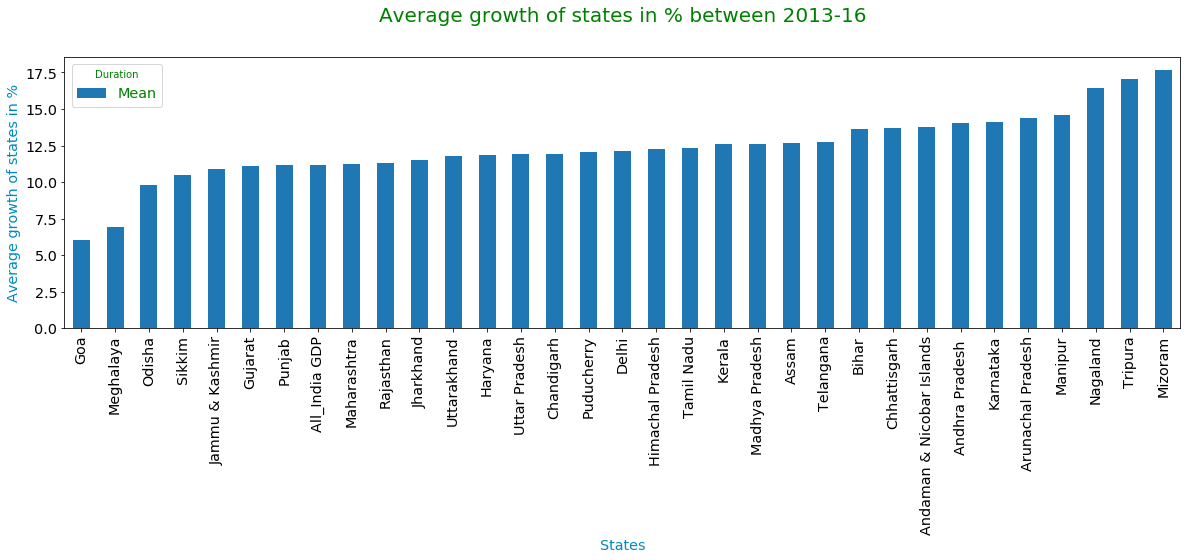

In [82]:
Growth_rate_df.loc[:,Growth_rate_df.columns.difference(['All_India GDP'])].sort_values('Mean').plot(kind='bar', y=['Mean'])
plt.title('Average growth of states in % between 2013-16')
plt.xlabel('States')
plt.ylabel('Average growth of states in %')
plt.show()

#### <font color='#008abc'>Plot of growth rate for states over years</font>

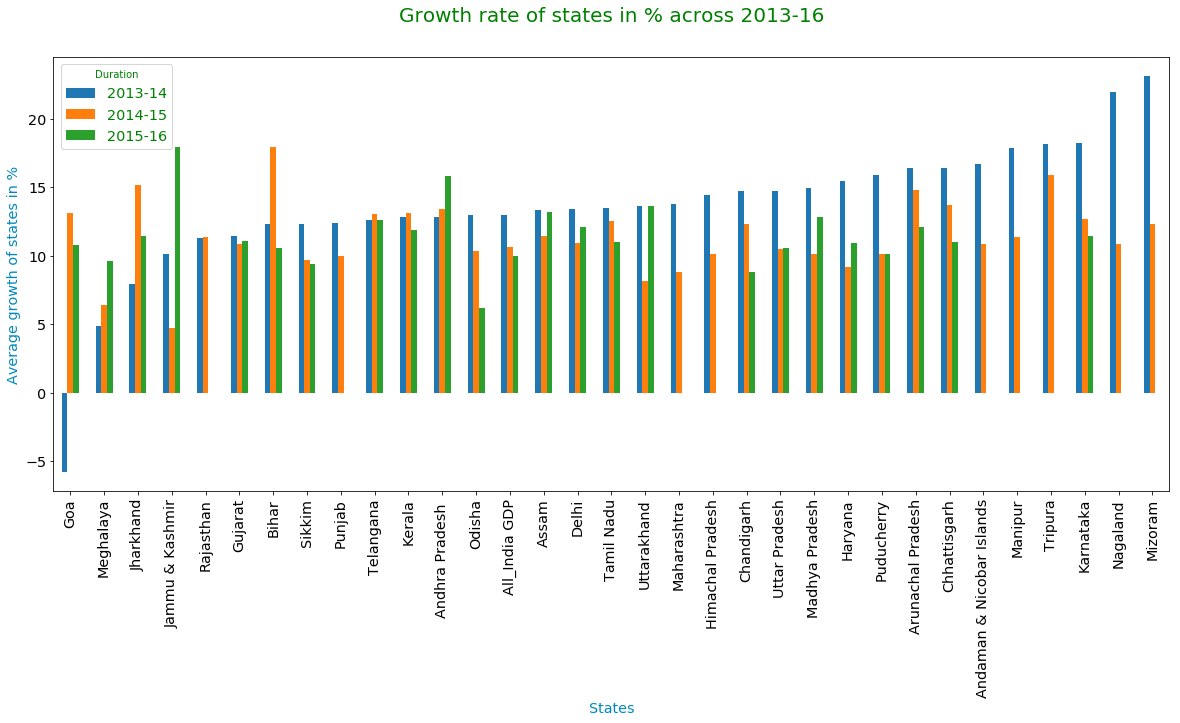

In [83]:
ax = Growth_rate_df.loc[:,Growth_rate_df.columns.difference(['All_India GDP'])].sort_values('2013-14').plot(kind='bar', y=['2013-14','2014-15','2015-16'],figsize=(20,8))
plt.title('Growth rate of states in % across 2013-16')
plt.xlabel('States')
plt.ylabel('Average growth of states in %')
plt.show()


<b> Inference: </b>From the above graphs, it can be inferred that the growth rate of <b>Meghalaya and Andra Pradesh</b> are growing consistently fast. Whereas most of the other states have a varying growth trend. Also the states of <b>Mizoram and Nagaland</b> are struggling as their growth rates have declined drastically over the years.

#### <font color='#008abc'>Home state comparison with All india</font>

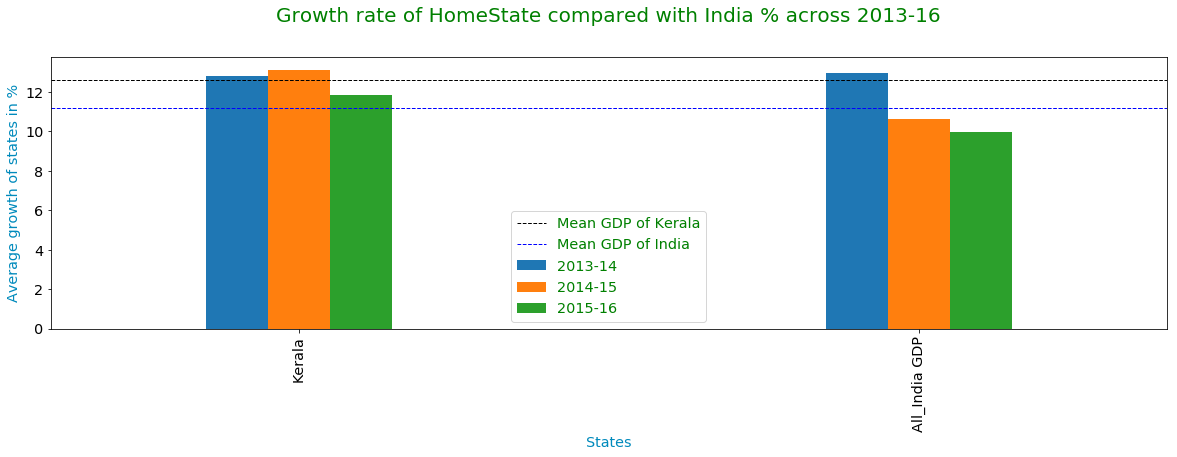

In [84]:
# Filter the data for your home state from the above dataset
home_state=Growth_rate_df.loc[Growth_rate_df.index.isin(['Kerala','All_India GDP'])]
kerala_mean=home_state.loc['Kerala',['Mean']].iloc[0]
all_india_mean=home_state.loc['All_India GDP',['Mean']].iloc[0]

# Plot the filtered data for detailed observation

ax=home_state.plot(kind='bar', y=['2013-14','2014-15','2015-16'],width=0.3)
plt.title('Growth rate of HomeState compared with India % across 2013-16')
plt.xlabel('States')
plt.ylabel('Average growth of states in %')
ax.axhline(y=kerala_mean, color='black', linewidth=1,linestyle='--',label='Mean GDP of Kerala')
ax.axhline(y=all_india_mean, color='blue', linewidth=1,linestyle='--',Label='Mean GDP of India')
plt.legend()
plt.show()


<b>Observation:</b>
From the above graph, we can see that the average growth rate of <b>Kerala</b> , is higher compared to that of <b>India</b>. the growth rate is also comparitively consistent when compared with the national growth rate.

### <font color='#008abc'>Total GDP of states for 2015-16</font>

<b> Assumption:</b> The states where there is no value for GSDP for 2015-16 are ignored for the analysis. The imputation is not done owing to the randomness in growth rates over years.

In [85]:
# Fetch the required data from the main dataframe

State_Total_GDP=state_gdp_df.loc[(state_gdp_df["Items  Description"]=="GSDP - CURRENT PRICES (` in Crore)") & 
                  (state_gdp_df["Duration"] == "2015-16")].copy()

In [86]:
# Retain only the required columns
State_Total_GDP.drop(['Items  Description','All_India GDP'], axis=1,inplace=True)

# drop rows where there are no values for the given year
State_Total_GDP.dropna(axis=1,inplace=True)
State_Total_GDP.set_index('Duration',inplace=True)

#### <font color='#008abc'>Plot state wise Total GDP</font>

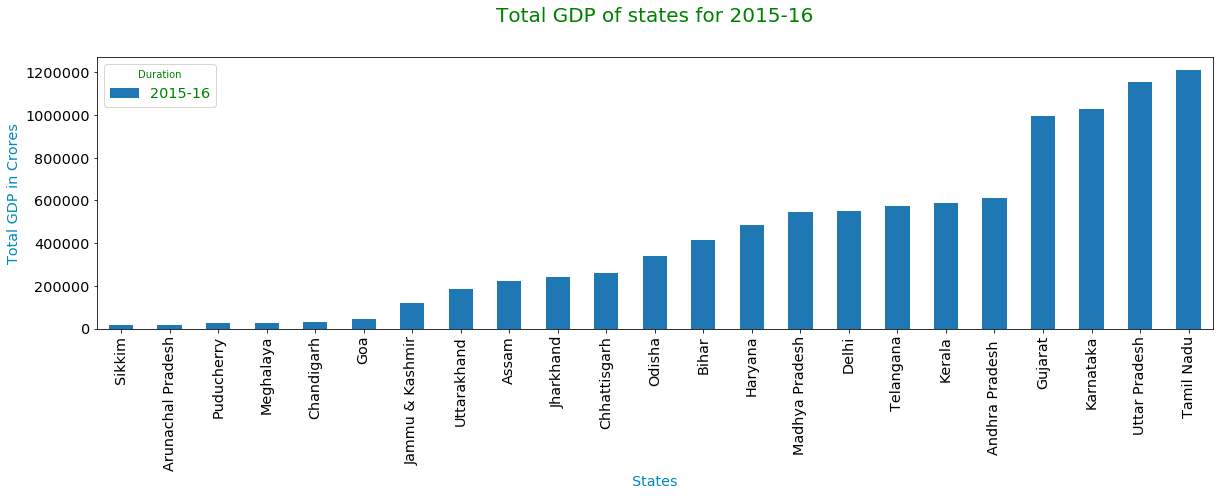

In [87]:
State_Total_GDP.T.sort_values('2015-16').plot(kind='bar',y=['2015-16'])
plt.title('Total GDP of states for 2015-16')
plt.xlabel('States')
plt.ylabel('Total GDP in Crores')
plt.show()

<b>Observation</b>: From the above graph, we can find that, 
- <b>Sikkim,Arunachal Pradesh,Puducherry,Meghalaya,Chandigarh</b> are the <b>bottom 5 states</b>
- <b>Andhra Pradesh,Gujarat,Karnataka,Uttar Pradesh and Tamil</b> Nadu are <b>the top 5 states</b>

### <font color='#008abc'> Part I-B:  </font>

### <font color='#008abc'><u>Data Preparation</u></font> :
The required data is fetched from the input CSV files into a single dataframe.

<u>Assumptions</u>: 
- As per the requirement, The data for the union territories are not required for analysis. Hence, the data for the union territories are not placed in the input files path.
- As per the requirement, The data is fetched only for the year 2014-15, while reading from the input csv's
- The folder containing the input files is placed within the same directory of the notebook

In [88]:
# Name of folder containing input files for Part I-B
path = 'States_GDP'

# Collect all files for the 28 indian states
input_files = [f for f in os.listdir(path) if f.endswith('.csv')]

# Iterate through the files, with proper encoding and fetch the specific columns required for analysis `usecols,
# Add the state as an indentifier to the data, the state is fetched from the filename

country_sector_df = pd.concat([pd.read_csv(os.path.join(path, f),
                                usecols=['S.No.','Item','2014-15'],
                                encoding='latin-1').
                                assign(State=f.split("-GSVA")[0][4:])
                                for f in input_files])

### <font color='#008abc'><u>Data Analysis</u></font> :
- The dataset is analyzed for checking the datatypes and missing values

In [89]:
country_sector_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 0 to 32
Data columns (total 4 columns):
S.No.      924 non-null object
Item       924 non-null object
2014-15    908 non-null float64
State      924 non-null object
dtypes: float64(1), object(3)
memory usage: 36.1+ KB


Since there are null values in the values for 2014-15, the data is further analysed to check the null values

In [90]:
country_sector_df[country_sector_df['2014-15'].isnull()]

,S.No.,Item,2014-15,State
13,6.2,Hotels & restaurants,NaN,Gujarat
16,7.2,Road transport,NaN,Gujarat
17,7.3,Water transport,NaN,Gujarat
18,7.4,Air transport,NaN,Gujarat
17,7.3,Water transport,NaN,Haryana
18,7.4,Air transport,NaN,Haryana
5,2.,Mining and quarrying,NaN,Manipur
17,7.3,Water transport,NaN,Manipur
20,7.6,Storage,NaN,Manipur
17,7.3,Water transport,NaN,Meghalaya



Upon drilling down further, we can see that the <b>sub sector</b> value is a summation of the <b>sub-sub sectors</b> and are complete without the sub-sub sectors with NaN. Hence we can remove the rows with NaN values.

In [91]:
# Drop all rows that have any NaN values
country_sector_df.dropna(inplace=True)

### <font color='#008abc'><u>GDP per capita for states</u></font>

In [92]:
# Fetch the GDP per capita for all the states
# Filter the per capita rows and the required columns alone from the dataframe

GDP_per_capita_states_df = country_sector_df.loc[country_sector_df['Item']=='Per Capita GSDP (Rs.)',['2014-15','State']].sort_values(by='2014-15',ascending=True)
GDP_per_capita_states_df.set_index('State',inplace=True)

#### <font color='#008abc'> Plot: GDP per capita for states </font>

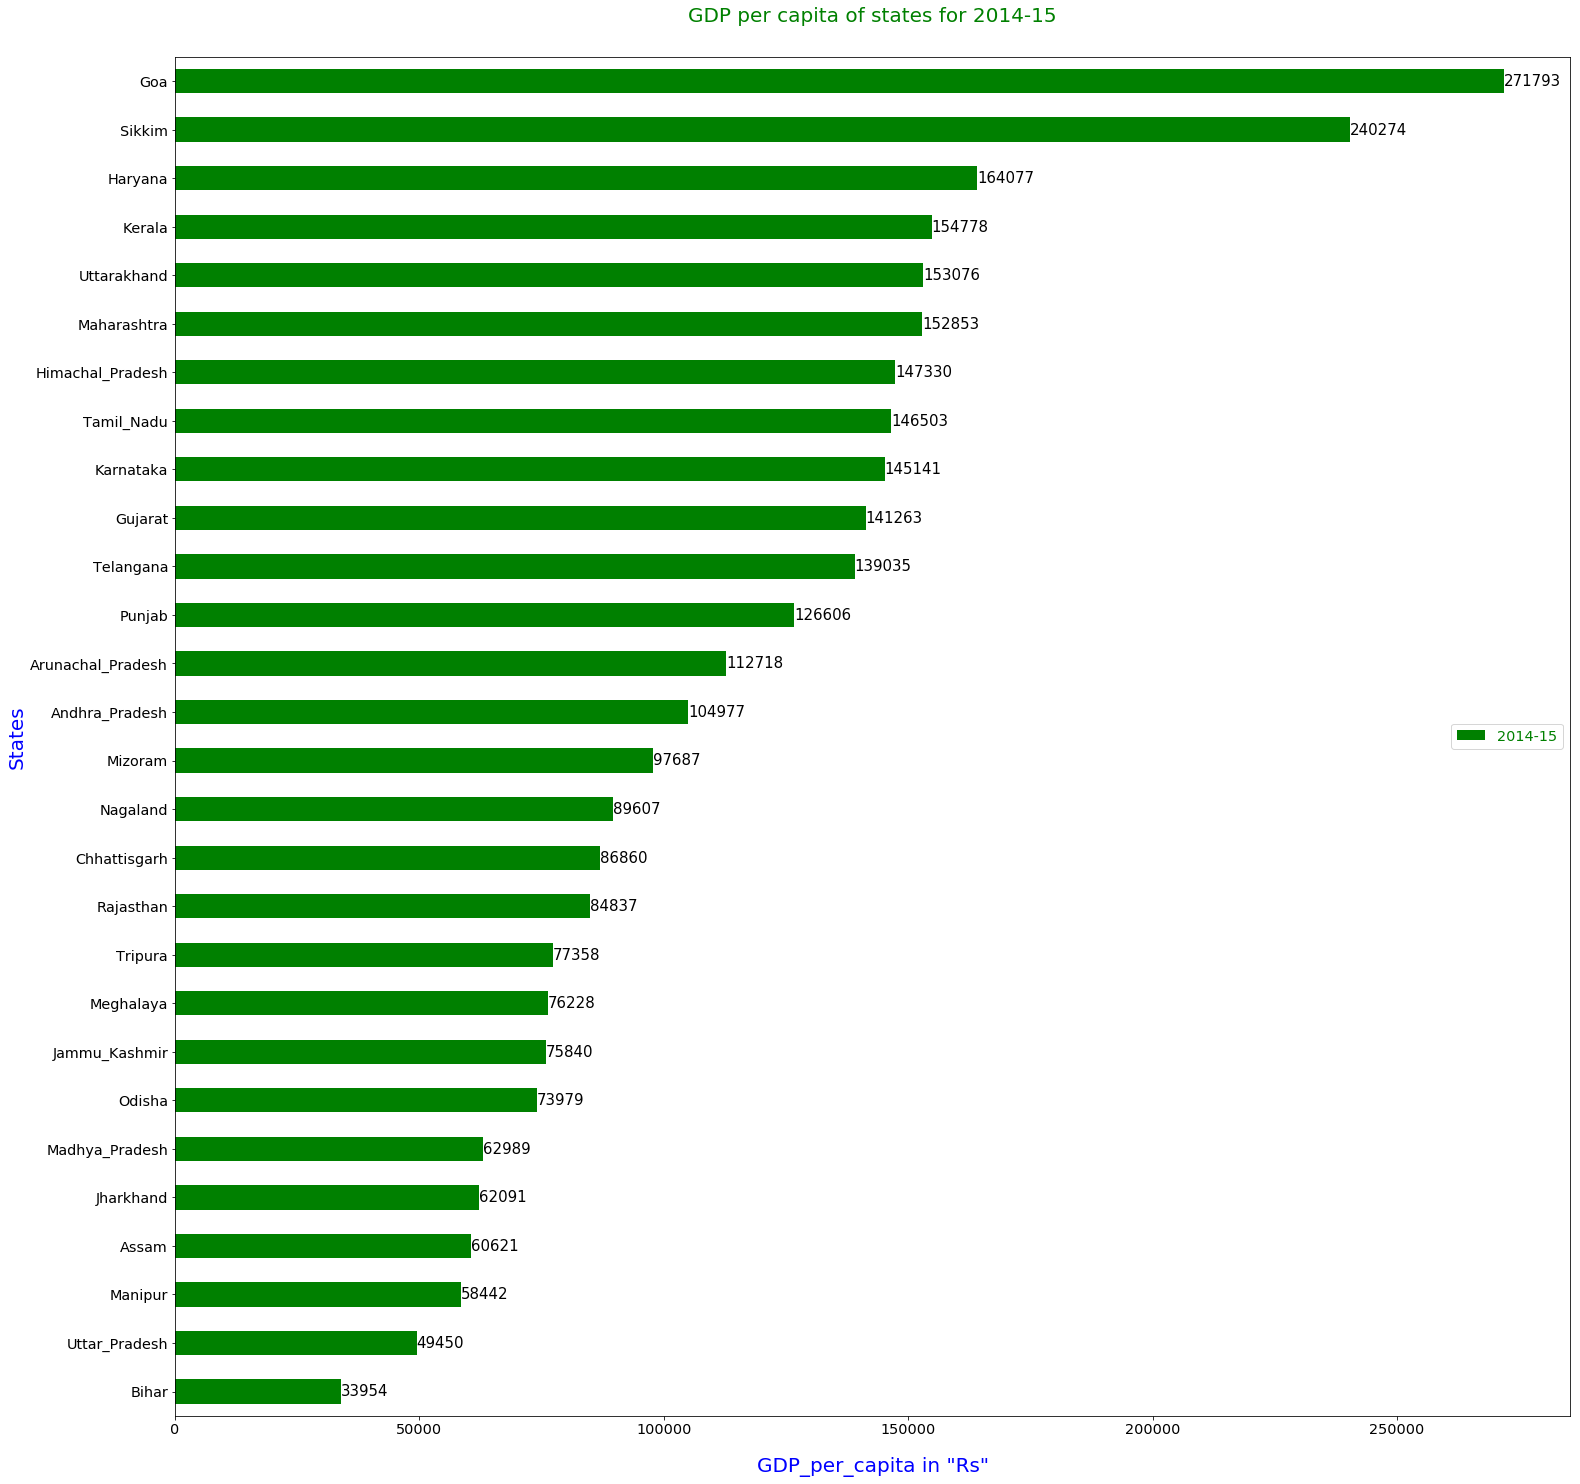

In [93]:
GDP_per_capita_states_df.plot(kind='barh',y='2014-15',color='green',figsize=(25,25))
plt.xlabel('GDP_per_capita in "Rs"', fontsize = 20,labelpad = 20,color='blue')
plt.ylabel('States',fontsize=20,color='blue')

# Label value marks for each state
for i,v in enumerate(GDP_per_capita_states_df['2014-15']):
    plt.text(v, i, " "+str(int(v)), color='black', va='center',ha='left',wrap=True,fontsize=15)

# Alignment of title and legend
plt.title("GDP per capita of states for 2014-15")
plt.legend(loc='center right')
plt.show()

<b>Observation:</b> From the above graph it can be inferred that the
- <b>Goa,Sikkim,Haryana,Kerala and Uttarakhand</b> are <b>the top 5 states</b>
- <b>Bihar,Uttar_Pradesh,Manipur,Assam and Jharkhand</b> are <b>the bottom 5 states</b>
The same can also be verified by the below steps.

#### Top 5 states

In [94]:
print ( "Top 5 states\n", GDP_per_capita_states_df.nlargest(5,'2014-15'),end='')
# plot(GDP_per_capita_states_df.nlargest(5,'2014-15'),'2014-15','GDP per capita of top 5 states for 2014-15',10)

Top 5 states
               2014-15
State                
Goa          271793.0
Sikkim       240274.0
Haryana      164077.0
Kerala       154778.0
Uttarakhand  153076.0

#### Bottom 5 states

In [95]:
print ( "Bottom 5 states",GDP_per_capita_states_df.nsmallest(5,'2014-15'),end='')

Bottom 5 states                2014-15
State                 
Bihar          33954.0
Uttar_Pradesh  49450.0
Manipur        58442.0
Assam          60621.0
Jharkhand      62091.0

#### <font color='#008abc'>Plot: Ratio of highest-lowest percapita GDP</font>

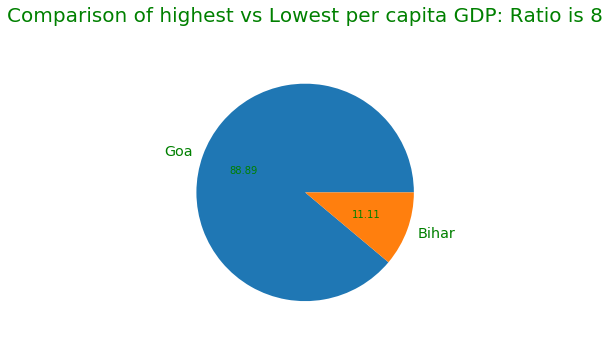

In [96]:
# Fetch the highest and lowest value from the dataset
values = [GDP_per_capita_states_df.iloc[-1],GDP_per_capita_states_df.iloc[0]]

# Plot the fetched data
labels = [GDP_per_capita_states_df.index.values[-1],GDP_per_capita_states_df.index.values[0]]
patches,texts,autotexts = plt.pie(values,labels=labels,autopct='%.2f')
Ratio = int(GDP_per_capita_states_df.iloc[-1]/GDP_per_capita_states_df.iloc[0])
title = plt.title("Comparison of highest vs Lowest per capita GDP: Ratio is "+str(Ratio))

###### Observation: From the above graph it can be incurred that the ratio of highest vs Lowest per capita GDP is 8

### <font color='#008abc'><u>State wise contribution of sectors to GDP<u></font>

In [97]:
# Fetch the sector data and GDP info from the main dataset
sector_contrib_df=country_sector_df.loc[(country_sector_df['Item'].isin(['Primary','Secondary','Tertiary','Gross State Domestic Product'])),['Item','2014-15','State']]
state_sector_df=sector_contrib_df.pivot(index='State', columns='Item', values='2014-15')

#### Compute percentage contribution of each sector

In [98]:
state_sector_df['Primary']=state_sector_df['Primary']/state_sector_df['Gross State Domestic Product']*100
state_sector_df['Secondary']=state_sector_df['Secondary']/state_sector_df['Gross State Domestic Product']*100
state_sector_df['Tertiary']=state_sector_df['Tertiary']/state_sector_df['Gross State Domestic Product']*100
state_sector_df['Total']=state_sector_df.apply(lambda x: x['Primary'] + x['Secondary']+x['Tertiary'], axis=1)

#### <font color='#008abc'>Plot: Percentage contribution of sectors to GDP</font>
<b>Note: </b> The cumulative percentage is not 100, as GDP is considered and since the taxes and subsidies are not provided at a sector level.

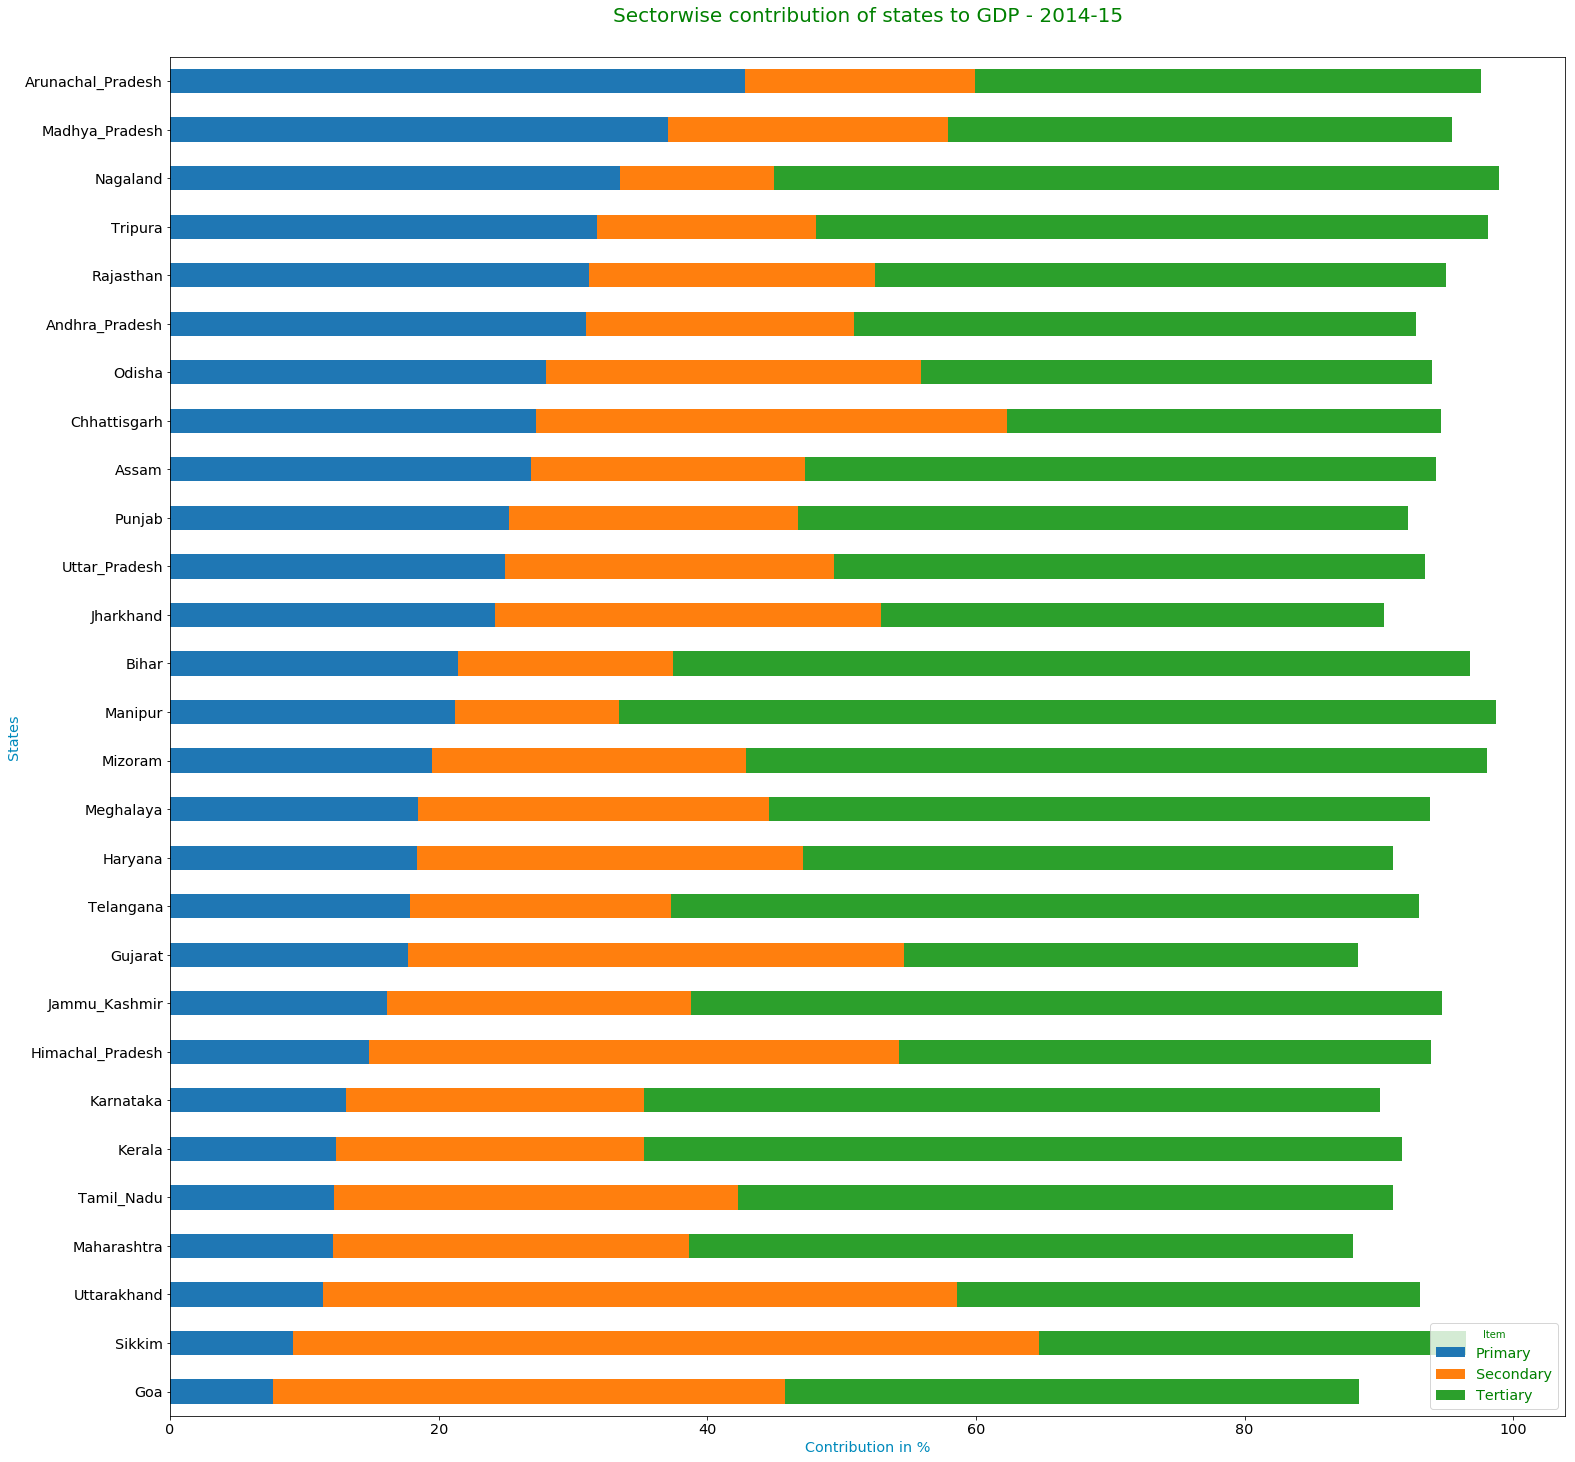

In [99]:
# Calling the plot function for the dataframe
state_sector_df.sort_values('Primary').plot(kind='barh',stacked=True,y=['Primary','Secondary','Tertiary'],figsize=(25,25))
plt.title("Sectorwise contribution of states to GDP - 2014-15")
plt.xlabel('Contribution in %')
plt.ylabel('States')
plt.show()

### <font color='#008abc'><u>Categorization of states based on GDP Per Capita<u></font>

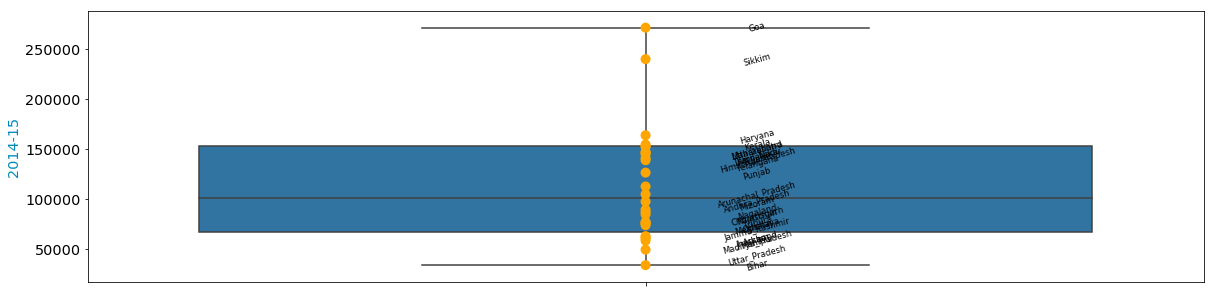

In [100]:
# Per_capita
quantiles = GDP_per_capita_states_df.quantile([0, 0.20, 0.5, 0.85, 1])
quantiles.index.name='Quartile'

ax = sns.boxplot(y='2014-15',data=quantiles)
ax = sns.stripplot(y='2014-15',data=GDP_per_capita_states_df,color="orange",size=10, jitter=False)

for i in range(len(GDP_per_capita_states_df)):
    ax.text(x=.1, y=GDP_per_capita_states_df.values[i], s=GDP_per_capita_states_df.index[i],horizontalalignment='center',size='small',color='black',rotation=15)
plt.show()


#### Compute bin values

In [101]:
# Compute the bin values based on the given percentile/quantile values
GDP_per_capita_states_df['bins']=pd.qcut(GDP_per_capita_states_df['2014-15'],[0,0.20,0.5,0.85,1],labels=range(4,0,-1))

In [102]:
# Create a copy of the main dataset,Map the computed bins to the new dataset
sector_category = country_sector_df.copy()
sector_category['bin']=sector_category['State'].map(GDP_per_capita_states_df['bins'])

#### Filter sub-sector data

In [103]:
# The sub sectors are present at rows where S.No is an integer
# Check if S.No is digit, then convert the same to int for future processing
Group_df = sector_category[sector_category[['S.No.']].apply(lambda x: x[0].isdigit(), axis=1)].copy()
Group_df['S.No.']=Group_df['S.No.'].astype(int)

#### Create a dataset for each category

In [104]:
# Group the dataset by bins to create a dictionary of dataframes
Categories = {x:y for x, y in Group_df.groupby(['bin'])} 

### <font color='#008abc'><u>Top sub-sectors which contribute 80% of GDP for each Category</u></font>

In [105]:
Category_percent = pd.DataFrame()

In [106]:
for df in list(Categories.values()):
    
    # Compute the total gdp for all states in a category
    total_gdp = df.loc[df['Item']=='Gross State Domestic Product', '2014-15'].sum()
    
    # Fetch the cumulative sum of cost for sub sectors within each category
    # Group by sub-sectors and then perform a sum of the values
    # Sort the result in descending value
    sectors=df.loc[df['S.No.'].between(1,11)].groupby('Item')['2014-15'].agg('sum').sort_values(ascending=False)
    
    # Compute the cumulative sum of subsectors, to compare with GDP
    cumsum_val=sectors.cumsum()
     
    # Fetch the index of the row where the cumulative sum is less than 80% of the GDP
    # Increment the index by 1 to fetch the next row, to fetch rows upto that index
    id = len(cumsum_val[cumsum_val < total_gdp*0.8])+1
    # The below dataframe contains the sectors that contribute upto 80% of the GDP
    cumsum_df=cumsum_val[:id]

    # Fetch the sectors from the main dataframe to get the actual value of the sector
    sect=sectors[cumsum_df.index]
    
    # Get the contribution of that sector to the total GDP
    contrib=sect/total_gdp*100
    
    # Create a dataframe that contains the sector name,value and contribution values
    per_contrib_df=pd.concat([sect.rename('Value'),contrib.rename('Percentage')],axis=1)
    per_contrib_df['Category']=df.bin.unique()[0]
    
    # Combine all the data into one dataframe
    Category_percent = Category_percent.append(per_contrib_df)

#     plt.rcParams["figure.figsize"] = [10, 10]
#     per_contrib_df.T.plot(kind='barh',stacked=True,y=per_contrib_df.index,fontsize=20)


#### <font color='#008abc'>Plot: Percentage contribution of sectors to GDP, for each category</font>

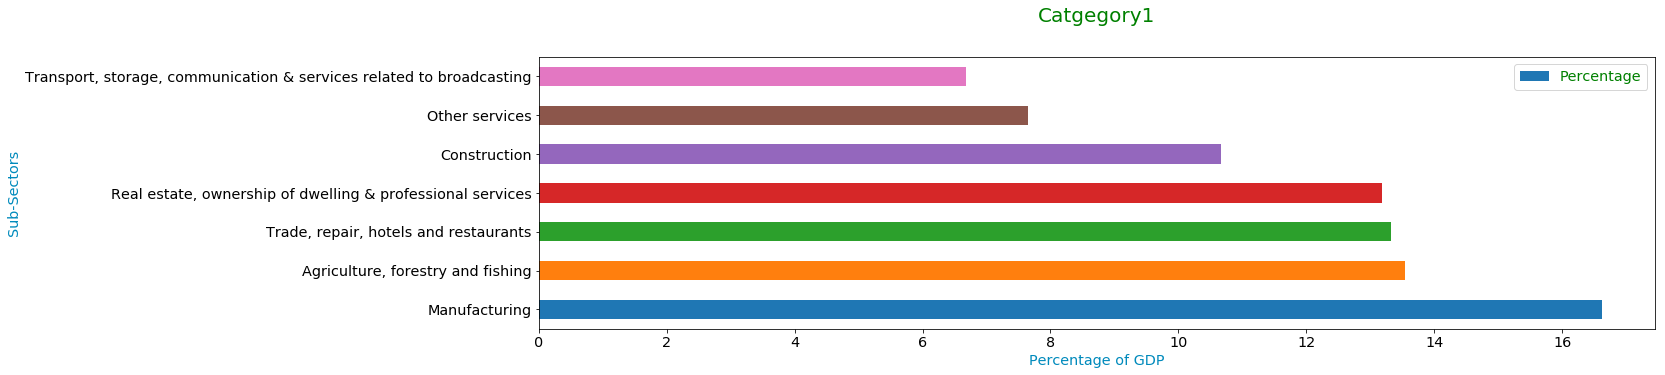

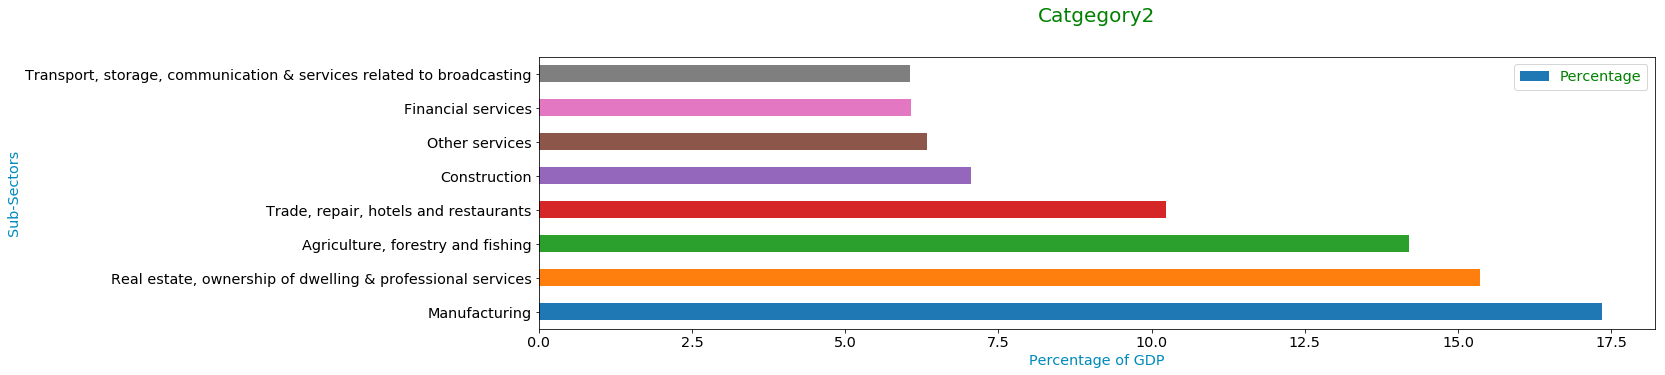

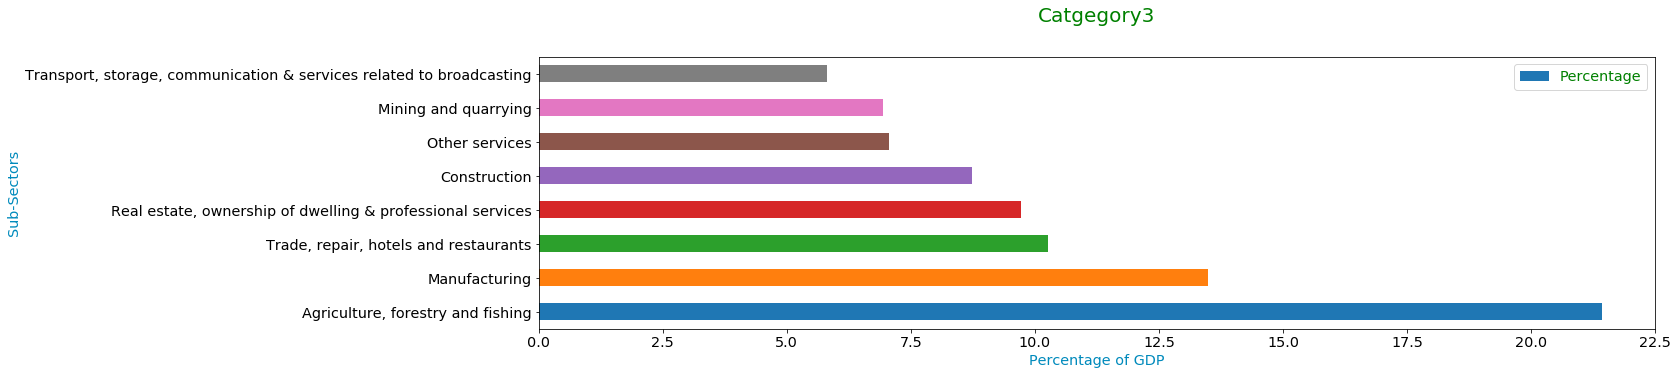

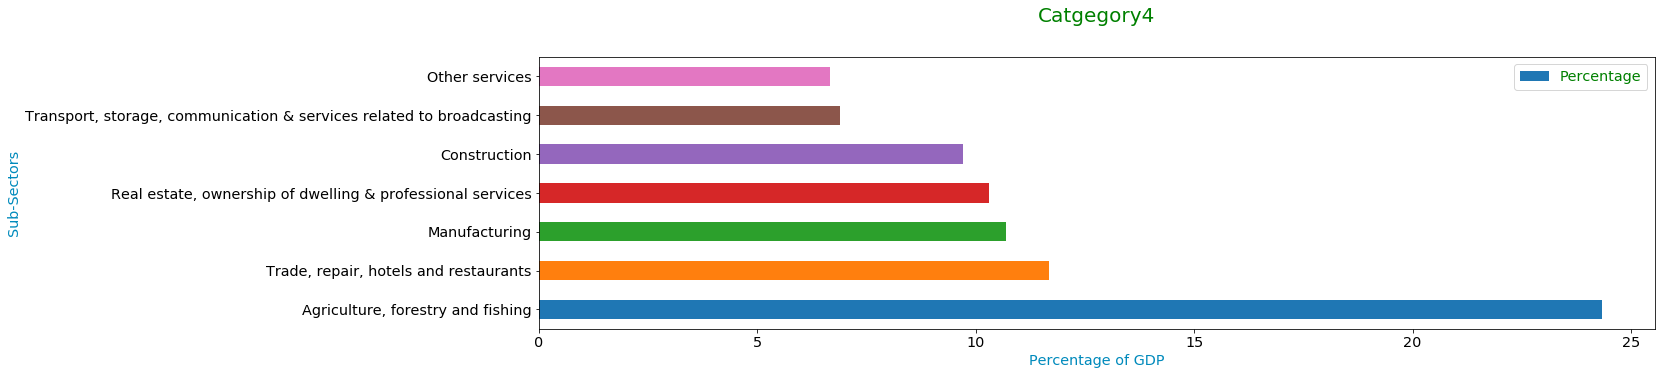

In [107]:
for title,groups in Category_percent.groupby('Category'):
    groups.plot(kind='barh',y='Percentage')
    plt.xlabel('Percentage of GDP')
    plt.ylabel('Sub-Sectors')
    plt.title('Catgegory'+str(title))

<b>Inferences:</b>

- From the above graphs, we can infer that <b>'Agriculture, forestry and fishing','Manufacturing and 'Trade, repair, hotels and restaurants'</b> are the top sub-sectorscontribute to the GDP.

- Also it can be noted that the states in Category 1, are tourist oriented places and also have a near equal contribution to the GDP from the top sub-sectors noted above.
    
- <font color='#008abc'><b>Category 1: 'Goa', 'Haryana', 'Kerala', 'Sikkim', 'Uttarakhand'</b></font>
    - Recommendations:
        1. Being tourist famous spots, the states can improvise on the broadcating category, which will automatically lead to increase in the Trade, hotels and restaurants.
        2. The primary sector also needs to be concentrated, as it currently has a limited contribution to GDP. If the 'Railways', 'Road transport', 'Water transport', 'Air transport' facilities are improved, it will automatically increase the GDP.
        
- <font color='#008abc'><b>Category 2: 'Andhra_Pradesh', 'Arunachal_Pradesh', 'Gujarat','Himachal_Pradesh', 'Karnataka', 'Maharashtra', 'Punjab','Tamil_Nadu', 'Telangana'</b></font>
    - Recommendations:
        1. Being states that are close to the sea, the states need to concentrate on 'Fishing and aquaculture' 
        2. The states are also the hosts of IT sectors and are densely populated, hence they should also concentrate on the finance and broadcasting sectors. They need to improvise and focus on the secondary sectors.
        
- <font color='#008abc'><b>Category 3: 'Chhattisgarh', 'Jammu_Kashmir', 'Meghalaya', 'Mizoram','Nagaland', 'Odisha', 'Rajasthan', 'Tripura'</b></font>
    - Recommendations:
        1. Apart from Agriculture, the other major sectors play a limited role in the contribution to GDP.The states needs to improvise on other top contributers.
        2. The contribution from Livestock can also be incresed, due to the favouring towards agriculture and forestry.
        
- <font color='#008abc'><b>Category 4: 'Assam', 'Bihar', 'Jharkhand', 'Madhya_Pradesh', 'Manipur','Uttar_Pradesh'</b></font>
    - Recommendations:
        1. Apart from Agriculture, the other major sectors play a limited role in the contribution to GDP. The states needs to improvise on other top contributers from the secondary and tertiary sectors
        2. These states needs to concentrate on the Mining and quarrying and manufacturing sectors as most of them contain a huge resource of minerals.

### <font color='#008abc'>Part II : GDP and Education drop out rates</font>

#### <font color='#008abc'><u>Data Preparation</u></font> :
- The required data is fetched from the input CSV files into a single dataframe.

- <u>Assumptions</u>: Only the required columns are fetched while reading from CSV.

In [108]:
# Read the drop out rates csv with the required columns

drop_out_rates = pd.read_csv('Average_Annual_Drop_Out Rate_2012_13_to_2014_15.csv',
                 usecols=['Level of Education - State','Primary - 2014-2015','Upper Primary - 2014-2015','Secondary - 2014-2015'],
                 encoding='latin-1')

#### <font color='#008abc'><u>Data analysis</u></font> :
- The data is analysed to check for missing values and datatypes

- <u>Assumptions</u>: As per the gov website, The data for the negative drop out rates are not provided.Hence the values are not imputed

In [109]:
drop_out_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
Level of Education - State    37 non-null object
Primary - 2014-2015           33 non-null float64
Upper Primary - 2014-2015     35 non-null float64
Secondary - 2014-2015         36 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.2+ KB


In [110]:
drop_out_rates.tail()

,Level of Education - State,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
32,Tripura,3.58,1.99,28.42
33,Uttar Pradesh,7.08,2.70,10.22
34,Uttrakhand,3.07,1.19,10.40
35,West Bengal,2.91,4.30,17.80
36,All India,4.34,4.03,17.06


#### <font color='#008abc'><u>Data Cleansing</u></font> :
- The dataset is analyzed for checking the datatypes and missing values
- The state names are corrected by cross verifyin with the GDP dataset

In [111]:
GDP_per_capita_states_df.index

Index(['Bihar', 'Uttar_Pradesh', 'Manipur', 'Assam', 'Jharkhand',
       'Madhya_Pradesh', 'Odisha', 'Jammu_Kashmir', 'Meghalaya', 'Tripura',
       'Rajasthan', 'Chhattisgarh', 'Nagaland', 'Mizoram', 'Andhra_Pradesh',
       'Arunachal_Pradesh', 'Punjab', 'Telangana', 'Gujarat', 'Karnataka',
       'Tamil_Nadu', 'Himachal_Pradesh', 'Maharashtra', 'Uttarakhand',
       'Kerala', 'Haryana', 'Sikkim', 'Goa'],
      dtype='object', name='State')

In [112]:
drop_out_rates.index

RangeIndex(start=0, stop=37, step=1)

In [113]:
# Cleanse the state names to match with those in the previous dataset
replacements = {r' ': '_',
                'Chhatisgarh':'Chhattisgarh',
                'Jammu_and_Kashmir' :'Jammu_Kashmir',
                'Uttrakhand':'Uttarakhand'}
drop_out_rates.replace(replacements, regex=True,inplace=True)
drop_out_rates.set_index('Level of Education - State', inplace=True)

In [114]:
# Combine the education and GDP datasets
# Bin retained to check if top tiers have any association with education
GDP_vs_Education = GDP_per_capita_states_df.merge(drop_out_rates,left_index=True, right_index=True, how='inner')
GDP_vs_Education.info()
GDP_vs_Education.rename({'2014-15':'GDP_PerCapita 2014-15'},axis='columns',inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, Bihar to Goa
Data columns (total 5 columns):
2014-15                      28 non-null float64
bins                         28 non-null category
Primary - 2014-2015          27 non-null float64
Upper Primary - 2014-2015    26 non-null float64
Secondary - 2014-2015        28 non-null float64
dtypes: category(1), float64(4)
memory usage: 1.2+ KB


In [115]:
# Correlation of GDP to Education sectors as a whole
corr=GDP_vs_Education.corr()
corr

,GDP_PerCapita 2014-15,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
GDP_PerCapita 2014-15,1.000000,-0.450806,-0.545651,-0.459350
Primary - 2014-2015,-0.450806,1.000000,0.435215,0.126935
Upper Primary - 2014-2015,-0.545651,0.435215,1.000000,0.545293
Secondary - 2014-2015,-0.459350,0.126935,0.545293,1.000000


When compared at a whole, the sectors seem to have negative correlation to the GDP. Lets compare the sectors contribution category wise.

In [116]:
corr=GDP_vs_Education.groupby('bins').corr()
corr

GDP_PerCapita 2014-15  Primary - 2014-2015  \
bins                                                                         
4    GDP_PerCapita 2014-15                   1.000000             0.562067   
     Primary - 2014-2015                     0.562067             1.000000   
     Secondary - 2014-2015                   0.049747            -0.460188   
     Upper Primary - 2014-2015               0.677055            -0.067805   
3    GDP_PerCapita 2014-15                   1.000000             0.557149   
     Primary - 2014-2015                     0.557149             1.000000   
     Secondary - 2014-2015                  -0.336657            -0.434718   
     Upper Primary - 2014-2015               0.266184             0.585818   
2    GDP_PerCapita 2014-15                   1.000000            -0.671296   
     Primary - 2014-2015                    -0.671296             1.000000   
     Secondary - 2014-2015                  -0.069811             0.225324   
     Upper Primary - 2014-2015              -0.627724             0.514518   
1    GDP_PerCapita 2014-15                   1.000000            -0.056018   
     Primary - 2014-2015                    -0.056018             1.000000   
     Secondary - 2014-2015                   0.059824             0.174485   
     Upper Primary - 2014-2015              -0.593817            -0.287081   

                                Secondary - 2014-2015  \
bins                                                    
4    GDP_PerCapita 2014-15                   0.049747   
     Primary - 2014-2015                    -0.460188   
     Secondary - 2014-2015                   1.000000   
     Upper Primary - 2014-2015               0.744003   
3    GDP_PerCapita 2014-15                  -0.336657   
     Primary - 2014-2015                    -0.434718   
     Secondary - 2014-2015                   1.000000   
     Upper Primary - 2014-2015              -0.385523   
2    GDP_PerCapita 2014-15                  -0.069811   
     Primary - 2014-2015                     0.225324   
     Secondary - 2014-2015                   1.000000   
     Upper Primary - 2014-2015               0.633540   
1    GDP_PerCapita 2014-15                   0.059824   
     Primary - 2014-2015                     0.174485   
     Secondary - 2014-2015                   1.000000   
     Upper Primary - 2014-2015               0.679897   

                                Upper Primary - 2014-2015  
bins                                                       
4    GDP_PerCapita 2014-15                       0.677055  
     Primary - 2014-2015                        -0.067805  
     Secondary - 2014-2015                       0.744003  
     Upper Primary - 2014-2015                   1.000000  
3    GDP_PerCapita 2014-15                       0.266184  
     Primary - 2014-2015                         0.585818  
     Secondary - 2014-2015                      -0.385523  
     Upper Primary - 2014-2015                   1.000000  
2    GDP_PerCapita 2014-15                      -0.627724  
     Primary - 2014-2015                         0.514518  
     Secondary - 2014-2015                       0.633540  
     Upper Primary - 2014-2015                   1.000000  
1    GDP_PerCapita 2014-15                      -0.593817  
     Primary - 2014-2015                        -0.287081  
     Secondary - 2014-2015                       0.679897  
     Upper Primary - 2014-2015                   1.000000

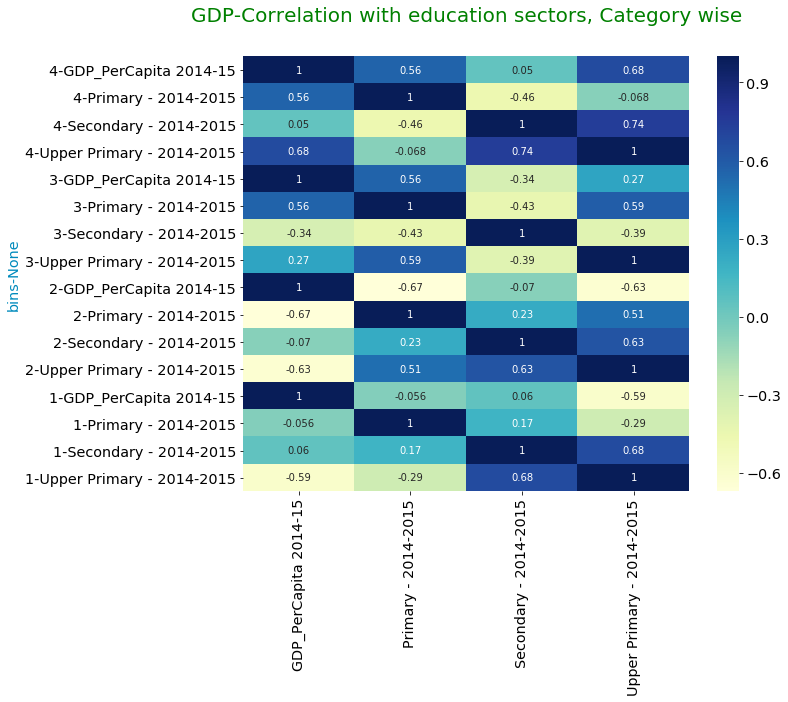

In [117]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title("GDP-Correlation with education sectors, Category wise")
plt.show()

<b>Inference:</b>

- It can be observed that the GDP is highly correlated with Primary and upper primary education sectors in the Category (Category 3,4)
- whereas it's least correlated to the education sectors for Categories (1,2)

<b> Hypothesis:</b>
Turns out that the GDP per capita is comparitvely dependent on education upto upper primary levels, in states which have high per capita GDP, whereas the GDP is neatively correlated to the states witha lower per capita GDP
   